In [1]:
# through this we can get a mean value of index output, on which we can decide our alpha and determine the hypotheses
# determine for every year, try plotting a graph (rough)

import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
# lst_files = ['./1998_ecar10mm_output.nc','']

ds_stacked = xr.open_dataset('./2005_ecar10mm_output.nc')
# ds_stacked.info()
val = ds_stacked['heavy_precipitation_days_index_per_time_period']
# val.plot()
val = val.values
np.nanmean(val)

0.57608694

In [1]:
# for heavy precipitation above 10 mm
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
lst_mean = []
lst_files = ['./1998_ecar10mm_output.nc','./1999_ecar10mm_output.nc','./2000_ecar10mm_output.nc','./2001_ecar10mm_output.nc','./2002_ecar10mm_output.nc','./2003_ecar10mm_output.nc','./2004_ecar10mm_output.nc','./2005_ecar10mm_output.nc','./2006_ecar10mm_output.nc','./2007_ecar10mm_output.nc','./2008_ecar10mm_output.nc','./2009_ecar10mm_output.nc','./2010_ecar10mm_output.nc','./2011_ecar10mm_output.nc','./2012_ecar10mm_output.nc','./2013_ecar10mm_output.nc','./2014_ecar10mm_output.nc','./2015_ecar10mm_output.nc','./2016_ecar10mm_output.nc','./2017_ecar10mm_output.nc','./2018_ecar10mm_output.nc','./2019_ecar10mm_output.nc']
for files in lst_files: 
    ds_stacked = xr.open_dataset(files)
    # ds_stacked.info()
    val = ds_stacked['heavy_precipitation_days_index_per_time_period']
    # val.plot()
    val = val.values
    lst_mean.append(np.nanmean(val))
lst_mean

[0.00082034455,
 0.67350286,
 0.57875305,
 0.41324857,
 0.38966367,
 0.5002051,
 0.49220672,
 0.57608694,
 0.73687446,
 0.7116489,
 0.56316656,
 0.47436422,
 0.6763741,
 0.6132075,
 0.5801887,
 0.6611977,
 0.48769483,
 0.4409352,
 0.41058245,
 0.42883512,
 0.43416736,
 0.6158737]

In [5]:
ds_stacked.info()

xarray.Dataset {
dimensions:
	time = 1 ;
	lat = 289 ;
	lon = 294 ;
	latv = 2 ;
	lonv = 2 ;
	nv = 2 ;

variables:
	float32 GPM_3IMERGHHE_06_precipitationCal(time, lat, lon) ;
		GPM_3IMERGHHE_06_precipitationCal:DimensionNames = time,lon,lat ;
		GPM_3IMERGHHE_06_precipitationCal:Units = mm/hr ;
		GPM_3IMERGHHE_06_precipitationCal:CodeMissingValue = -9999.9 ;
		GPM_3IMERGHHE_06_precipitationCal:origname = precipitationCal ;
		GPM_3IMERGHHE_06_precipitationCal:fullnamepath = /Grid/precipitationCal ;
		GPM_3IMERGHHE_06_precipitationCal:standard_name = precipitationcal ;
		GPM_3IMERGHHE_06_precipitationCal:quantity_type = Precipitation ;
		GPM_3IMERGHHE_06_precipitationCal:product_short_name = GPM_3IMERGHHE ;
		GPM_3IMERGHHE_06_precipitationCal:product_version = 06 ;
		GPM_3IMERGHHE_06_precipitationCal:long_name = Multi-satellite precipitation estimate with climatological gauge calibration - Early Run ;
		GPM_3IMERGHHE_06_precipitationCal:units = mm/hr ;
	float32 lat(lat) ;
		lat:DimensionNa

In [2]:
import numpy as np
from scipy.stats import kendalltau

# Your data (replace with your actual data)
data = [10, 12, 8, 15, 18, 22, 25, 28, 26, 30]

# Create an array of ranks for the data
ranked_data = np.argsort(data)

# Calculate Kendall's Tau statistic and p-value
tau, p_value = kendalltau(data, ranked_data)

# Print the results
print(f"Kendall's Tau: {tau}")
print(f"P-Value: {p_value}")

# Interpret the results based on the p-value and tau value



Kendall's Tau: 0.911111111111111
P-Value: 2.9761904761904762e-05


In [6]:
# for one file
# do this for every output file, calculate p_value, store in an array/lis and pass it to the kendall test to determine hypothesis

import numpy as np
from scipy.stats import kendalltau

# Your data (replace with your actual data)
data = lst_mean

# Create an array of ranks for the data
ranked_data = np.argsort(data)

# Calculate Kendall's Tau statistic and p-value
tau, p_value = kendalltau(data, ranked_data)

# Print the results
print(f"Kendall's Tau: {tau}")
print(f"P-Value: {p_value}")

# Interpret the results based on the p-value and tau value


Kendall's Tau: 0.9999999999999999
P-Value: 0.016666666666666666


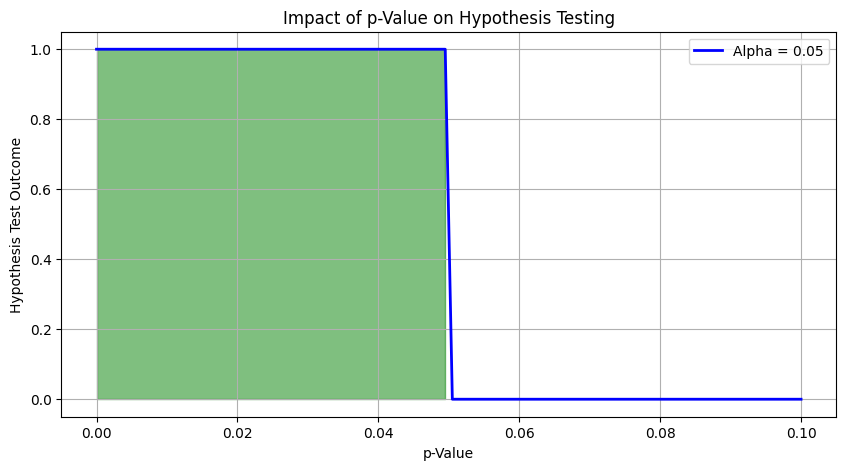

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of p-values (e.g., from 0 to 0.1)
p_values = np.linspace(0, 0.1, 100)

# Define the alpha level (e.g., 0.05)
alpha = 0.05

# Create an array to store the test outcomes (0 for fail to reject, 1 for reject)
test_outcomes = np.where(p_values < alpha, 1, 0)

# Create a plot
plt.figure(figsize=(10, 5))
plt.plot(p_values, test_outcomes, label=f'Alpha = {alpha}', color='blue', lw=2)

# Highlight the region where null hypothesis is rejected (shaded area)
plt.fill_between(p_values, 0, test_outcomes, where=(test_outcomes == 1), color='green', alpha=0.5)

# Add labels and title
plt.xlabel('p-Value')
plt.ylabel('Hypothesis Test Outcome')
plt.title('Impact of p-Value on Hypothesis Testing')

# Add a legend
plt.legend()

# Show the plot
plt.grid()
plt.show()
